In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loc1 = pd.read_csv('/Users/aryamanghaisas/Downloads/archive/Location1.csv')

In [6]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [8]:
loc1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [10]:
loc1['Time'] = pd.to_datetime(loc1['Time'])
loc1['Year']=loc1['Time'].dt.year
loc1['Month']=loc1['Time'].dt.month

In [12]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
 10  Year                 43800 non-null  int32         
 11  Month                43800 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(3)
memory usage: 3.7 MB


In [14]:
loc1['Hour'] = loc1['Time'].dt.hour
loc1.head(2)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Hour
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1


In [16]:
min_year = loc1['Year'].min()
max_year = loc1['Year'].max()
loc1['Month_sin'] = np.sin(2 * np.pi * loc1['Month'] / 12)
loc1['Month_cos'] = np.cos(2 * np.pi * loc1['Month'] / 12)


loc1['Year_sin'] = np.sin(2 * np.pi * (loc1['Year'] - min_year) / (max_year - min_year))
loc1['Year_cos'] = np.cos(2 * np.pi * (loc1['Year'] - min_year) / (max_year - min_year))
loc1.head(2)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Year_sin,Year_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,0,0.5,0.866025,0.0,1.0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1,0.5,0.866025,0.0,1.0


In [20]:
loc1_100m_dropped2 = loc1.drop(columns=['windspeed_100m', 'winddirection_100m','Year_sin','Year_cos'])
loc1_100m_dropped2['Day'] = loc1_100m_dropped2['Time'].dt.day
loc1_100m_dropped2['Day_sin'] = np.sin(2 * np.pi * loc1_100m_dropped2['Day'] / 31) 
loc1_100m_dropped2['Day_cos'] = np.cos(2 * np.pi * loc1_100m_dropped2['Day'] / 31)
loc1_100m_dropped2['Hour_sin'] = np.sin(2 * np.pi * loc1_100m_dropped2['Hour'] / 24) 
loc1_100m_dropped2['Hour_cos'] = np.cos(2 * np.pi * loc1_100m_dropped2['Hour'] / 24)

In [24]:
loc1_100m_dropped2.head()corr = loc1_100m_dropped.corr()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,winddirection_10m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Day,Day_sin,Day_cos,Hour_sin,Hour_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,146,1.4,0.1635,2017,1,0,0.5,0.866025,2,0.394356,0.918958,0.000000,1.000000
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,151,4.4,0.1424,2017,1,1,0.5,0.866025,2,0.394356,0.918958,0.258819,0.965926
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,148,3.2,0.1214,2017,1,2,0.5,0.866025,2,0.394356,0.918958,0.500000,0.866025
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,58,1.6,0.1003,2017,1,3,0.5,0.866025,2,0.394356,0.918958,0.707107,0.707107
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,58,4.0,0.0793,2017,1,4,0.5,0.866025,2,0.394356,0.918958,0.866025,0.500000


In [26]:
corr = loc1_100m_dropped2.corr()

In [28]:
corr

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,winddirection_10m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Day,Day_sin,Day_cos,Hour_sin,Hour_cos
Time,1.000000,0.083809,0.010174,0.085495,-0.031308,0.010738,-0.036019,-0.011625,9.797955e-01,1.975848e-01,5.474694e-04,-1.508169e-01,4.389068e-02,1.782099e-02,-1.373761e-02,4.361585e-03,-4.247882e-04,-5.592442e-05
temperature_2m,0.083809,1.000000,-0.137993,0.934813,-0.112036,-0.151642,-0.008929,-0.207101,3.317212e-02,2.576528e-01,7.419974e-02,-5.367460e-01,-6.630159e-01,2.420215e-02,-3.290615e-02,1.434126e-02,-8.248379e-02,-1.922912e-01
relativehumidity_2m,0.010174,-0.137993,1.000000,0.217657,-0.221810,-0.078012,-0.342357,-0.070360,-1.172936e-02,1.050791e-01,-1.933038e-01,-1.319096e-01,1.437870e-01,4.247601e-02,-4.027340e-02,2.663209e-02,2.191378e-01,5.062577e-01
dewpoint_2m,0.085495,0.934813,0.217657,1.000000,-0.185900,-0.176322,-0.127375,-0.223739,2.691517e-02,2.955734e-01,8.264268e-03,-5.819166e-01,-6.017768e-01,3.889135e-02,-4.627083e-02,2.271423e-02,-5.412659e-03,-8.381500e-03
windspeed_10m,-0.031308,-0.112036,-0.221810,-0.185900,1.000000,0.170281,0.936677,0.732801,-1.969944e-02,-6.098463e-02,2.780046e-02,1.577768e-01,1.776157e-01,1.484294e-03,3.405160e-03,1.719166e-02,-1.935331e-02,-1.816465e-01
winddirection_10m,0.010738,-0.151642,-0.078012,-0.176322,0.170281,1.000000,0.163340,0.157623,7.527140e-03,1.795744e-02,-8.486766e-02,2.851327e-02,1.620901e-01,-1.881230e-02,1.249751e-02,2.934998e-02,1.067826e-01,-1.965696e-03
windgusts_10m,-0.036019,-0.008929,-0.342357,-0.127375,0.936677,0.163340,1.000000,0.662677,-2.296123e-02,-6.802138e-02,6.725682e-02,1.450442e-01,1.057340e-01,-3.252753e-03,9.692987e-03,2.173709e-02,-6.744422e-02,-3.452078e-01
Power,-0.011625,-0.207101,-0.070360,-0.223739,0.732801,0.157623,0.662677,1.000000,-1.057067e-03,-5.610037e-02,-4.269764e-02,1.815885e-01,2.291618e-01,2.782814e-02,-2.827788e-02,2.087245e-02,5.035587e-02,3.259223e-02
Year,0.979796,0.033172,-0.011729,0.026915,-0.019699,0.007527,-0.022961,-0.001057,1.000000e+00,-1.751914e-03,-1.766553e-15,1.033290e-03,1.225604e-03,-7.143103e-04,2.349281e-06,1.624242e-03,-1.301982e-15,-7.910248e-16
Month,0.197585,0.257653,0.105079,0.295573,-0.060985,0.017957,-0.068021,-0.056100,-1.751914e-03,1.000000e+00,-1.239034e-16,-7.609159e-01,2.105273e-01,9.340817e-03,-2.357890e-03,1.075502e-02,-5.743083e-18,2.990294e-18


<Axes: >

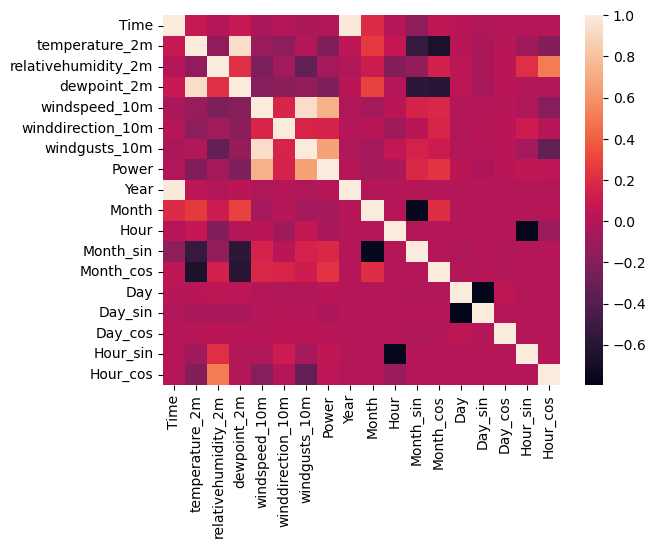

In [30]:
sns.heatmap(corr)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf4 = RandomForestRegressor(max_depth = 30, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, random_state=42)
X_dropped = loc1_100m_dropped2.drop(columns=["Power", "Time","Day","Year","Month","Hour"])
y_dropped = loc1_100m_dropped2["Power"]

X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)
rf4.fit(X_train, y_train)

y_pred = rf4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae,mse,rmse,r2)

0.10062837853356339 0.018686374564924103 0.13669811470874096 0.7741895537728134


In [54]:
X_test.columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'winddirection_10m', 'windgusts_10m', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos'],
      dtype='object')

In [70]:
pred_values = pd.DataFrame({"Value":y_test, "Pred":y_pred, "Error":y_test-y_pred})

In [78]:
pred_values

,Value,Pred,Error
28101,0.2914,0.326818,-0.035418
25482,0.0854,0.128894,-0.043494
19891,0.3951,0.400823,-0.005723
43029,0.0917,0.253858,-0.162158
40286,0.0007,0.033400,-0.032700
...,...,...,...
36067,0.3432,0.263901,0.079299
43757,0.0632,0.182770,-0.119570
21611,0.1110,0.263540,-0.152540
21928,0.0949,0.256770,-0.161870


In [82]:
pred_values["Date"] = X_test['Day_cos']

In [84]:
pred_values

,Value,Pred,Error,Date
28101,0.2914,0.326818,-0.035418,-0.954139
25482,0.0854,0.128894,-0.043494,0.918958
19891,0.3951,0.400823,-0.005723,-0.440394
43029,0.0917,0.253858,-0.162158,0.918958
40286,0.0007,0.033400,-0.032700,0.151428
...,...,...,...,...
36067,0.3432,0.263901,0.079299,-0.758758
43757,0.0632,0.182770,-0.119570,0.979530
21611,0.1110,0.263540,-0.152540,-0.440394
21928,0.0949,0.256770,-0.161870,0.688967


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='Date', ylabel='Value'>

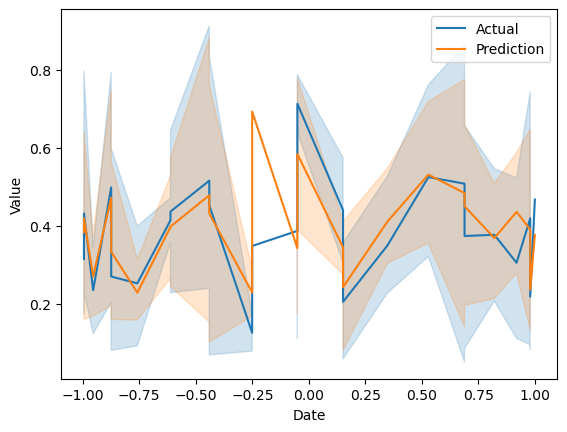

In [88]:
sns.lineplot(x=pred_values['Date'][:100], y=pred_values['Value'][:100], label="Actual")

sns.lineplot(x=pred_values['Date'][:100], y=pred_values['Pred'][:100]import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf4, f)
, label="Prediction")

In [90]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf4, f)